# **OCR**

## **Part 1: Numerical Character Recognition**

### Import Libraries

The google.colab import box can be ignored, this was used initially to train and test the model. To run the GUI the code needs to be executed using an IDE, as the pygame module (see Part 3) requires a graphics card, which is not currently available in google colab.

In [1]:
# This step is specific to Google Colab
# Using the google.colab library, a link between the Google drive and this code is made
# from google.colab import drive

# Here the select user drive is mounted
# drive.mount ('/content/drive')

The following are the libraries imported to perform all math and machine leanring related operations, alongisde file handling

In [1]:
# Libraries for plotting and math functions are imported
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
# import keras
# from keras.datasets import mnist

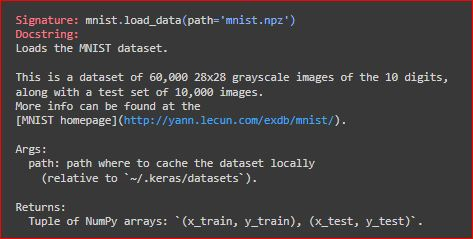

The above image shows a brief description of the mnist dataset alongside what the dataset returns when it is extracted.

The dataset consists of 60,000 pictures of numbers from 0-9. Alongisde 10,000 test set images, to test the training model in identifying the numbers.

In [3]:
# Extracting the data from the imported dataset of mnist
# The .load_data function is used to extract the data from the mnist.npz file
# The respective varaibles are assigned to the datafile 
# (based on what the .load_data returns see image above)
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()

In [5]:
print(train_img.shape),
print(train_lab.shape),
print(test_img.shape),
print(test_lab.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


After extracting the data, the dataset must be normalised between 0 to 1, this can be done by casting the imported data arrays as float objects inspecific to float 32, and then dividing by the maximum value of a byte the number by 255.

After casting the datatype, we need to add 4th value to the shape dimension which will be used by the ML algorithm

In [6]:
# The .astype function from pd is used to cast float 32 on the data array
# While the np.expand_dims function is used to add another dim
train_img = np.expand_dims( (train_img.astype(np.float32) / 255.0), -1)
test_img = np.expand_dims( (test_img.astype(np.float32) / 255.0), -1)

print(train_img.shape),
print(train_lab.shape),
print(test_img.shape),
print(test_lab.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [7]:
# The y axis data in this case the labels need to be processed using the one hot
# enocding process, this can easily be done by using the to_categorical function
train_lab = to_categorical(train_lab)
test_lab = to_categorical(test_lab)

### Train Model

In this section the Machine Learning model will be built using the import tensorflow.keras libraries and functions.

Since the labels are between one and zero the ReLU activation function can be used. As its easy in terms of computational reqruiments, and works well with the classification problem with mnist dataset [SOURCE: keras.io].

Softmax activation is used in the Dense layer, as its generally recommended for multi-class classification [SOURCE: medium.com]

In [ ]:
# Assigining values to variables to be used in the model
# Number of input for the first layer 32 as float32 casting
Units_O = 32
# Number of inputs for the second layer double the first layer
Units_T = 64
# Number of inputs for the thirs layer double the second layer
Units_Th = 128
# Kernal size is set to standarad 3, 3
Kern_size = (3,3)
# Input shape is the shape that was created after the altering the size of the 
# arrays so the new size of each input was 28, 28, 1
input_shape = (28, 28, 1)

# Initialize ML model
model = Sequential()
# First layer to the model using relu activation
model.add(Conv2D(Units_O, Kern_size, input_shape = (28, 28, 1), activation='relu'))
# Second layer 
model.add(MaxPool2D((2,2)))
# Third layer to the model also using relu activation
model.add(Conv2D(Units_T, Kern_size, activation='relu'))
# Fourth layer 
model.add(MaxPool2D((2,2)))
# Fifth layer to the model also using relu activation
model.add(Conv2D(Units_Th, Kern_size, activation='relu'))
# Sixth layer 
model.add(MaxPool2D((2,2)))

# Flatten the entire model
model.add(Flatten())
# Using dropout, we can prevent overfitting, set to 0.2
model.add(Dropout(0.20))
# Dense layer is used for the process of classification
# Since the mnist data set consists of numbers between 0-9 there are total of
# 10 classes, hence a total of 10 nodes, each for each case
classes = 10
# The activation used for the dense layer is softmax, as its better
# for classicification with single inputs, as each time a image is assessed once.

model.add(Dense(classes, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 128)       

The training model is compiled using the adam optimizer. The adam optimizer is an addition to the SGD algorithm, except that the Adam optimization algorithm allows the weights to be optimized iteratively based on the training data [SOURCE: machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/]. 

Since the problem at hand is a multiclass classification problem the default choice for the loss function is the cross-entropy loss function [SOURCE: machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/].
The crossentropy loss function calcaulates the difference between the actual and predicted porbability for all of the classes in the classification system [SOURCE: machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/]. 

The model.compile function can also be used to assess the accuracy of the model by using metrics [SOURCE: tutorialspoint.com].

In [ ]:
# Compiling the model
# The optimizer used is adam 
model.compile(optimizer = 'adam', 
              loss = categorical_crossentropy,
              metrics = ['accuracy'])

The earlystopping and modelcheckpoint are used together for the model training. 

The earlystopping function prevents the model to be overfitted and stops the traiing when a set goals for accuracy is met [SOURCE: keras.io]. 

While the modelcheckpoint saves the model and weights to a file at intervals, this allows the model to be retrieved later, rather then retraiing the model everytime the code is executed [SOURCE: keras.io]. It can even be used to store multiple models and then use the best one [SOURCE: keras.io].

Parameters [SOURCE: keras.io]:

*   monitor = the qunatity that needs to be monitored
*   min_delta = minimum change in monitored value
*   patience = number of epochs to be assessesd with no imporovements before stopping the training
*   verbose = to display the callback in action (0) or not (1)

In [ ]:
# The earlystopping callback is implement this will stop the model training 
# Once the minimum delta (the accuracy) is met, patience is the number of trials
Early_stop = EarlyStopping(monitor = 'accuracy', 
                           min_delta = 0.005, 
                           patience = 10, 
                           verbose = 1)

# The Modelcheckpoint callback is implemented this saves the trained model at 
# set intervals, the saved model can later be retrieved. 
# first parameter is file pathway, .h5 is the file extension
Model_check = ModelCheckpoint("./modelset_best.h5", 
                              monitor = "accuracy", 
                              verbose = 1, 
                              save_best_only = True, 
                              save_weights_only = False)

# Creating a callback array, that utilizes both callback functions
Call_backs = [Early_stop, Model_check]

# Evaulating the model in combination with the callback functions
epochs = 1000
batch_size = 20
history = model.fit(train_img, train_lab, 
                    epochs, 
                    batch_size, 
                    callbacks = Call_backs)

# Saving the model
model.save("Best_Mnist_model.h5")
# Loading the save model to be accesssed later
model_mnist = load_model("Best_Mnist_model.h5")

Epoch 1/20
60/60 [==============================] - ETA: 0s - loss: 1.0150 - accuracy: 0.7127
Epoch 1: accuracy improved from -inf to 0.71270, saving model to ./modelset_best.h5
60/60 [==============================] - 45s 736ms/step - loss: 1.0150 - accuracy: 0.7127
Epoch 2/20
60/60 [==============================] - ETA: 0s - loss: 0.2558 - accuracy: 0.9227
Epoch 2: accuracy improved from 0.71270 to 0.92267, saving model to ./modelset_best.h5
60/60 [==============================] - 44s 739ms/step - loss: 0.2558 - accuracy: 0.9227
Epoch 3/20
60/60 [==============================] - ETA: 0s - loss: 0.1671 - accuracy: 0.9495
Epoch 3: accuracy improved from 0.92267 to 0.94952, saving model to ./modelset_best.h5
60/60 [==============================] - 44s 738ms/step - loss: 0.1671 - accuracy: 0.9495
Epoch 4/20
60/60 [==============================] - ETA: 0s - loss: 0.1333 - accuracy: 0.9598
Epoch 4: accuracy improved from 0.94952 to 0.95980, saving model to ./modelset_best.h5
60/60 [==

The accuracy and loss functions are plotted below with the end accuracy of the model stated below.

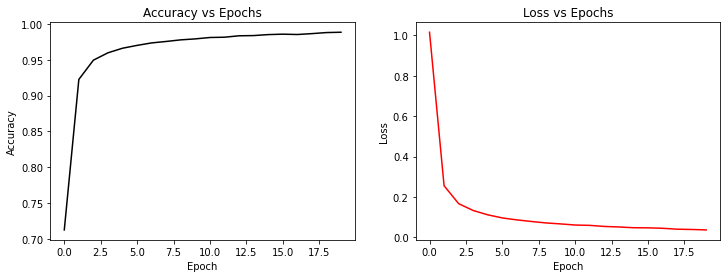



The Accuracy of the Model is  98.85  %


In [ ]:
# Plot
Acc = history.history['accuracy']
Loss_hist = history.history['loss']

# The function is used to alternate the size of the graphs (width, height)
plt.rcParams['figure.figsize'] = [12,4]
# Ploting the Accuracy Function
plt.subplot(1, 2, 1)
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(Acc, color = 'black')
# Ploting the Loss Function
plt.subplot(1, 2, 2)
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(Loss_hist, color = 'red')
plt.show()

# Accuracy of the model
Acc_round = Acc[((np.size(Acc))-1)]
# Accuracy of the model in percent
percent_Acc = round((Acc_round * 100), 2)
print("\n\nThe Accuracy of the Model is ", percent_Acc, " %")

## **Part 2: Alphabet Character Reocgnition**

### Import Libraries

In [9]:
# Use the commented out line to download the emnist data set
# !pip install emnist
from emnist import list_datasets
from emnist import extract_training_samples
from emnist import extract_test_samples

The emnist library consists of 6 packages [SOURCE: nist.gov]

*   ByClass 814,255 charac, 62 unbalanced classes
*   ByMerge 814,255 charac, 47 unbalanced classes
*   Balanced 131,600 charac, 47 unbalanced classes
*   Letters 145,600 charac, 26 unbalanced classes
*   Digits 280,000 charac, 10 unbalanced classes
*   MNIST 70,000 charac, 10 unbalanced classes

Unlike the mnist dataset that was directly imported from the tensorflow libraries, the emnist dataset needs to be downloaded. It can easily be done using !pip install. 

In this section the letters are used, so the list from emnist dataset that is to be used is letters. 

In [10]:
# Extracting the data from the imported dataset of letters
# The respective variables are assigned to the datafile 
Alpha_train_img, Alpha_train_lab = extract_training_samples('letters')
Alpha_test_img, Alpha_test_lab = extract_test_samples('letters')

In [11]:
print(Alpha_train_img.shape),
print(Alpha_train_lab.shape),
print(Alpha_test_img.shape),
print(Alpha_test_lab.shape)

(124800, 28, 28)
(124800,)
(20800, 28, 28)
(20800,)


After extracting the data, the dataset must be normalised between 0 to 1, this can be done by casting the imported data arrays as float objects inspecific to float 32, and then dividing by the maximum value of a byte the number by 255.

After casting the datatype, we need to add 4th value to the shape dimension which will be used by the ML algorithm

In [12]:
# The .astype function from pd is used to cast float 32 on the data array
# While the np.expand_dims function is used to add another dim
Alpha_train_img = np.expand_dims( (Alpha_train_img.astype(np.float32) / 255.0), -1)
Alpha_test_img = np.expand_dims( (Alpha_test_img.astype(np.float32) / 255.0), -1)

print(Alpha_train_img.shape),
print(Alpha_train_lab.shape),
print(Alpha_test_img.shape),
print(Alpha_test_lab.shape)

(124800, 28, 28, 1)
(124800,)
(20800, 28, 28, 1)
(20800,)


The label dataset needs to go under one hot encoding, so the values vary between one or zero.

In [13]:
# The y axis data in this case the labels need to be processed using the one hot
# enocding process, this can easily be done by using the to_categorical function
Alpha_train_lab = to_categorical(Alpha_train_lab)
Alpha_test_lab = to_categorical(Alpha_test_lab)

### Train Model

Like the mnist dataset, the letters subset of the emnist dataset also consists of multiple classes, hence for the ML algorithm ReLU activation is used.

For the Dense layer softmax activation is used, as stated previously it is recommended in cases where multiclass classification needs to be made [SOURCE: tutorialspoint]. 

In [ ]:
# Assigining values to variables to be used in the model
# Number of input for the first layer 32 as float32 casting
Units_O = 32
# Number of inputs for the second layer double the first layer
Units_T = 64
# Number of inputs for the thirs layer double the second layer
Units_Th = 128
# Kernal size is set to standarad 3, 3
Kern_size = (3,3)
# Input shape is the shape that was created after the altering the size of the 
# arrays so the new size of each input was 28, 28, 1
input_shape = (28, 28, 1)

# Initialize ML model
model = Sequential()
# First layer to the model using relu activation
model.add(Conv2D(Units_O, Kern_size, input_shape = (28, 28, 1), activation='relu'))
# Second layer 
model.add(MaxPool2D((2,2)))
# Third layer to the model also using relu activation
model.add(Conv2D(Units_T, Kern_size, activation='relu'))
# Fourth layer 
model.add(MaxPool2D((2,2)))
# Fifth layer to the model also using relu activation
model.add(Conv2D(Units_Th, Kern_size, activation='relu'))
# Sixth layer 
model.add(MaxPool2D((2,2)))

# Flatten the entire model
model.add(Flatten())
# Using dropout, we can prevent overfitting, set to 0.2
model.add(Dropout(0.20))
# Dense layer is used for the process of classification
# Since the emnist sub set letters dataset consists of alphabets 
# there are total of 27 classes, hence a total of 26 nodes, each for each case
classes = 27
# The activation used for the dense layer is softmax, as its better
# for classicification with single inputs, as each time a image is assessed once.

model.add(Dense(classes, activation = 'softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 1, 1, 128)       

The training model is compiled using the adam optimizer. As stated the adam optimizer allows iterative updates to the weights, which in result allow better training [SOURCE: machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/]. 

Since there are 26 letters, that means there are 26 classes, which means the problem at hand is a multiclass classification problem the default choice for the loss function is the cross-entropy loss function [SOURCE: machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/].
The crossentropy loss function calcaulates delta between the actual and predicted porbability for all of the classes [SOURCE: machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/]. 

Using the metrics parameter of the model.compile function, the accuracy of the model is also determined [SOURCE: tutorialspoint.com].

In [ ]:
# Compiling the model
# The optimizer used is adam 
model.compile(optimizer = 'adam', 
              loss = categorical_crossentropy,
              metrics = ['accuracy'])

The earlystopping and modelcheckpoint are used together for the model training. The functions of each callback is explained in Part 1: Section Train Model.

For reference here are the basic parameters that are being used with there respective properties [SOURCE: keras.io]:
*   monitor = the qunatity that needs to be monitored
*   min_delta = minimum change in monitored value
*   patience = number of epochs to be assessesd with no imporovements before stopping the training
*   verbose = to display the callback in action (0) or not (1)

In [ ]:
# The earlystopping callback is implement this will stop the model training 
# Once the minimum delta (the accuracy) is met, patience is the number of trials
Early_stop = EarlyStopping(monitor = 'accuracy', 
                           min_delta = 0.005, 
                           patience = 10, 
                           verbose = 1)

# The Modelcheckpoint callback is implemented this saves the trained model at 
# set intervals, the saved model can later be retrieved. 
# first parameter is file pathway, .h5 is the file extension
Model_check = ModelCheckpoint("./modelset_best.h5", 
                              monitor = "accuracy", 
                              verbose = 1, 
                              save_best_only = True, 
                              save_weights_only = False)

# Creating a callback array, that utilizes both callback functions
Call_backs = [Early_stop, Model_check]

# Evaulating the model in combination with the callback functions
epochs = 1248
batch_size = 20
history = model.fit(Alpha_train_img, Alpha_train_lab, 
                    epochs, 
                    batch_size, 
                    callbacks = Call_backs)

# Saving the model
model.save("Best_letters_model.h5")
# Loading the save model to be accesssed later
model_alpha = load_model("Best_letters_model.h5")

Epoch 1/20
100/100 [==============================] - ETA: 0s - loss: 0.4398 - accuracy: 0.8550
Epoch 1: accuracy improved from -inf to 0.85501, saving model to ./modelset_best.h5
100/100 [==============================] - 95s 944ms/step - loss: 0.4398 - accuracy: 0.8550
Epoch 2/20
100/100 [==============================] - ETA: 0s - loss: 0.4188 - accuracy: 0.8627
Epoch 2: accuracy improved from 0.85501 to 0.86268, saving model to ./modelset_best.h5
100/100 [==============================] - 95s 948ms/step - loss: 0.4188 - accuracy: 0.8627
Epoch 3/20
100/100 [==============================] - ETA: 0s - loss: 0.4022 - accuracy: 0.8672
Epoch 3: accuracy improved from 0.86268 to 0.86719, saving model to ./modelset_best.h5
100/100 [==============================] - 95s 945ms/step - loss: 0.4022 - accuracy: 0.8672
Epoch 4/20
100/100 [==============================] - ETA: 0s - loss: 0.3908 - accuracy: 0.8712
Epoch 4: accuracy improved from 0.86719 to 0.87118, saving model to ./modelset_bes

The accuracy and loss functions are plotted below with the end accuracy of the model stated below.

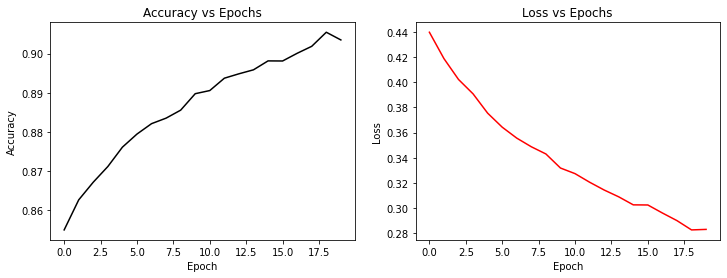



The Accuracy of the Model is  90.35  %


In [ ]:
# Plot
Alpha_Acc = history.history['accuracy']
Alpha_Loss_hist = history.history['loss']

# The function is used to alternate the size of the graphs (width, height)
plt.rcParams['figure.figsize'] = [12,4]
# Ploting the Accuracy Function
plt.subplot(1, 2, 1)
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(Alpha_Acc, color = 'black')
# Ploting the Loss Function
plt.subplot(1, 2, 2)
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(Alpha_Loss_hist, color = 'red')
plt.show()

# Accuracy of the model
Alpha_Acc_round = Alpha_Acc[((np.size(Alpha_Acc))-1)]
# Accuracy of the model in percent
percent_Alpha_Acc = round((Alpha_Acc_round * 100), 2)
print("\n\nThe Accuracy of the Model is ", percent_Alpha_Acc, " %")

The accuracy of the EMNIST model is not that high, it could be improved by using more layers, and node. But in general a linear increase in the accuracy can be seen, with the Loss also decreasing linearly.

The MNIST model on the other hand is far more accurate then the EMNIST model. This can also be observed in Part 3, when executing the Main_Application.py file. The numbers are detected at a much better rate in comparison to the letters.

The MNIST model increased in accuracy and decreased in loss at an exponential rate, when looking at the graphs produced by the training models. 

## **Part 3: Testing and GUI**

### Testing Trained Models

Note: If the you dont want to rerun the training module, the best models (that have been saved and provided) can be used. 

For the Numerical CR the model file is labeled as: Best_Model_model.h5

For the Alphabet CR the model file is labeled as: Best_letters_model.h5

Simply import these files by using the commands below.

In [2]:
# The path associated to the model is assigned to a variable
# Simply copy and paste the path associated to the saved model files
# In vscode, the relative path can be given
model_mnist = load_model('Best_Mnist_model.h5')
model_alpha = load_model('Best_letters_model.h5')

In [15]:
# To test the trained models the test datasets can be used
# This can be done by using the model.evaluate(test, testlabel)
# The .evaluate assesses the loss and accuracy
# To access loss we need the [0] element
# To access the accuracy we need the [1] element

# MNIST model
mnist_test = model_mnist.evaluate(test_img, test_lab)
print("Loss of mnist model: ", mnist_test[0])
print("Accuracy of mnist model: ", mnist_test[1])
# Alpha EMNIST model
Alpha_test = model_alpha.evaluate(Alpha_test_img, Alpha_test_lab)
print("Loss of mnist model: ", Alpha_test[0])
print("Accuracy of mnist model: ", Alpha_test[1])

313/313 [==============================] - 5s 12ms/step - loss: 0.0433 - accuracy: 0.9869
Loss of mnist model:  0.04333271458745003
Accuracy of mnist model:  0.9868999719619751
650/650 [==============================] - 8s 12ms/step - loss: 0.2826 - accuracy: 0.9070
Loss of mnist model:  0.282608300447464
Accuracy of mnist model:  0.9069711565971375


### GUI

#### Description of GUI Function

In this section pygame is used to create a console in which the user can draw using there mouse. The user can either draw a number or alpha character.

Once the user has finished drawing, a screenshot of the console will be captured and convereted to a 28,28 image that will be given to the trained model to make a prediction. 

The prediction will then be outputted to the user. 

#### PyGame functions Descriptions

To start a console is intialised
To sustain the console or prevent it from quiting a while loop is created

The pygame handles all of its messages (consisting of events) through a event queue, the queue's rely on the .display module (it is what handles the controlling of the window console and screen) of pygame [Source: pygame.org].

The while loop is exited when the user hits the close key, this is an event hence using the pygame.event.get() command, the event can be utilised in an if statement, once the condition of QUIT is met then the console will be exited [SOURCE: pygame.org]

To do so we need to capture the cordinates of the cursor when the user is drawing, this is done by using the MOUSEMOTION event, and the position can be retrieved using event.pos from pygame [SOURCE: pygame.org].

The pygame.draw comand allows us to draw multiple shapes, but to keep things easy each point will be drawn as a circle.
This can be done by using the pygame.draw.circle command, the command has the following parameters; console, color, position in the console (cordinates), radius, and width (set to 0) [SOURCE: pygame.org]

#### NOTES [READ BEFORE RUNNING CODE]

NOTE1: The interactive application, must be executed in an IDE. In an IDE run Main_Application.py to test the model by drawing custom letters and numbers

NOTE2: If you have drawn an Alphabet hit the 'A' key to assess the drawing using the letters model

NOTE3: If you have drawn a Number hit the 'N' key to assess the drawing using the mnist model

NOTE4: To reset the screen hit the escape buttion

NOTE5: To quit simply close the window

#### GUI CODE [Main_Application.py]

RUN THIS PART OF THE CODE IN AN IDE AN BY CREATING A .PY FILE. 

OR SIMPLY RUN THE Main_Application.py FILE

In [ ]:
import pygame
from pyparsing import White
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import pygame
import sys
from pygame.locals import *
import cv2 as cv
from tkinter import *
from tkinter import messagebox

# The following command is from the tkinter library
# It allows the main window to be hidden until the messagebox has been exited
Tk().wm_withdraw()

# Using the .showinfo command we can show a prompt to the user that will pop up
# The parameters are (Tittle of window, Message)
messagebox.showinfo("READ BEFORE CONTINUING","After running the code, the user will be asked to select a size for the window, the default size will be selected by simply hitting enter. \n\nDraw an object using the mouse, and holding down the left button. \n\nAfter drawing, indicate whether a number was drawn or a letter by pressing the key N or A respectively, this so the correct ML model can be used to predict whats drawn. \n\nTo clear the conosle and draw the next image hit the 'esc' key")

# This box is used to intialise set of variables that are to be used by pygame
# Intialiazation of the color variables
# The RGB vlaues for the colors was obtained from the following source
# https://www.rapidtables.com/web/color/RGB_Color.html
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)
GRAY = (128, 128, 128)
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)

# The path associated to the model is assigned to a variable
# Simply copy and paste the path associated to the saved model files
# In vscode, the relative path can be given
model_mnist = load_model('Best_Mnist_model.h5')
model_alpha = load_model('Best_letters_model.h5')

bound_cond = 2

# The window size for the .display module needs to be provided (see below)
# The variable that will be used are intialized
x_size = int()
y_size = int()

# We will create a library for the system to use, when utlising the models
Labels_Mnist = {0:"Zero", 1:"One", 2:"Two", 3:"Three", 4:"Four", 
                5:"Five", 6:"Six", 7:"Seven", 8:"Eight", 9:"Nine"}

Labels_Alpha = {0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 
                5:"F", 6:"G", 7:"H", 8:"I", 9:"J",
                10:"K", 11:"L", 12:"M", 13:"N", 14:"O", 
                15:"P", 16:"Q", 17:"R", 18:"S", 19:"T",
                20:"U", 21:"V", 22:"W", 23:"X", 24:"Y",
                25:"Z"}

# Initial Condition set to false, for the variable that will become true 
# If the user is holding down the mouse button when drawing
Drawing = False
# Variable set to true for Prediction
Model_Prediction = True

# An array to store all the positions of the mouse positions when the user draws
# And keep in store to to continously display the numbers drawn
x_cord_position_array = []
y_cord_postion_array = []

# IMAGESAVE = False
# Variable to be used to resize image
Image_size = (28,28)

# An array that will hold the values for the converted image to array
Img_Model  = []

# Application window for pygame is intialized
pygame.init()

# User input to get a small or large window
print("Input the size of the window you would like to interact")
print("large or small")
# Take input from the user
size_selection = input()

# If the user inputted small, then a window of 500x400 will be created
if (size_selection.lower() == "small"):
  x_size = 500
  y_size = 400
# If the user inputted large, then a window of 700x500 will be created
elif (size_selection.lower() == "large"):
  x_size = 700
  y_size = 500 
# If the user inputs anything else or empty input then a standard window 
# of the size 500x500 will be created
else:
  x_size = 500
  y_size = 500

# Font to be used in the window/console
# Font SOURCE: https://www.fontspace.com/ariana-violeta-font-f34433
FONT = pygame.font.Font("ArianaVioleta-dz2K.ttf", 35)

# Displaying the console with the user selected measurments 
# The resizable command is givne so the size of the console can be altered by the user
display_dim = pygame.display.set_mode((x_size, y_size), pygame.RESIZABLE)
# WHILE_INT = display_dim.mp_rgb(WHITE)
# Icon for the console
pygame.display.set_icon((pygame.image.load('ICON.jpg')))
# Tittle of the console
pygame.display.set_caption("Alpha | ## Character Recognition")

# To sustain the console continously rather then it closing,
# A while loop is used that only closes when a select key is inputted.
while True:
    # This for loop continously runs to go through the event queue 
    for event in pygame.event.get():
        # As the console stays on, a way of quiting the console needs to be created
        # This can be done by using .event.get() command WINDOWSRESIZED [Source:pygame.org],
        # Where if the user hits the close button it will close the console
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

        # In case the set size of the windows is not right, using .display.update command
        # The event for this case would be WINDOWSRESIZED [Source:pygame.org]
        if event.type == pygame.VIDEORESIZE:
            display_dim = pygame.display.set_mode((event.w, event.h), pygame.RESIZABLE)
            # Update the size variables
            x_size = event.w
            y_size = event.h

        # The following position activates whenever the curosr is within the console/window
        if event.type == pygame.WINDOWENTER:
            # Whenever the cursor is withing the window it will change its icon
            pygame.mouse.set_cursor(pygame.SYSTEM_CURSOR_CROSSHAIR)


        # The following assess the condition if the user is holding down the mousebutton
        # If this condition is true then the Drawing condtion becomes true
        if event.type == MOUSEBUTTONDOWN:
            Drawing = True
        
        # Recording the movement of the mouse whenever the user is drawing, 
        # And then displaying it (pygame.draw)
        if event.type == MOUSEMOTION and Drawing:
            x_cord_position, y_cord_postion = event.pos
            # Saving the position values of the mouse into the arrays
            x_cord_position_array.append(x_cord_position)
            y_cord_postion_array.append(y_cord_postion)

            # Using the saved position values to draw on the console using pygame.draw
            pygame.draw.circle(surface = display_dim, color = WHITE, center = (x_cord_position, y_cord_postion), radius = 3, width = 0) 

        # When the user stops drawing (mouse button is no longer pressed)
        # This means the Drawing condition needs to change
        # The drawn number needs to be captured as an image
        if event.type == MOUSEBUTTONUP:
            Drawing = False
            x_cord_position_array = sorted(x_cord_position_array)
            y_cord_postion_array = sorted(y_cord_postion_array)

            # Drawing a rectangle around the drawn number (as mentioned in the GUI description above)
            # Assigning the size of the rectangular box
            x_max = (max(x_cord_position_array))
            x_min = (min(x_cord_position_array))
            y_max = (max(y_cord_postion_array))
            y_min = (min(y_cord_postion_array))

            width = x_max - x_min
            height = y_max - y_min

            # Determining the position/ cordinates for the different sides of a rectangle
            rectangle_Left = (max((x_min - bound_cond), 0))
            rectangle_Right = (min(x_size, (x_max + bound_cond)))
            rectangle_Up = (y_min - bound_cond)
            rectangle_Down = (min((y_max + bound_cond), x_size))

            # Reinitializing the arrays as empty
            x_cord_position_array = []
            y_cord_postion_array = []
            
            # Using Pygame to save the scrrenshot of the drawn image
            pygame.image.save(display_dim, "image.jpg")

            # Using OpenCV library to import the stored image
            img_imported = cv.imread("image.jpg")
            # Calculating parameters for CV to compress the image 
            ratio = 28.0 / img_imported.shape[1]
            dim = (28, int(img_imported.shape[0] * ratio))

            # Using the calculated parameters to resize the image as a 28x28 image
            resized_img = cv.resize(img_imported, dim, interpolation=cv.INTER_AREA)
            # Saving the new 28x28 Image
            cv.imwrite("Model_img.png", resized_img)

            # Loading the saved 28x28 Image
            Img_Model = image.load_img('Model_img.png')
            # Converting the image to an array using the tf library
            Img_Model = img_to_array(Img_Model)
            Img_Model = (Img_Model/255.0)
            # Adjusting the shape of the array so it fits the model
            Img_Model = Img_Model[ :, : , :1]

            # Adding a dimensional component so the shape is 1, 28, 28, 1
            Img_Model = np.expand_dims(Img_Model, 0)
            
        # To use the two different models the user can let the system know if theres an alphabet or a number
        # Using the input the respective models can be used to analyse and predict the drawings    
        if event.type == pygame.KEYDOWN:
            # If the user hits the n key the mnist model will be used for prediction
            if event.key == pygame.K_n:
                # Using .predict, the probability for the number or alphabet is made
                model_prediction = model_mnist.predict(Img_Model)

                # The highest probability is selected as the main prediction 
                # And the label for the probability is selected from the defined dictionary
                # And converted to a string object
                prediction_results = np.argmax(model_prediction)
                prediction_results = str(Labels_Mnist[prediction_results])

                # The predicted number is turned into a label
                prediction_label = FONT.render(prediction_results, True, BLACK, WHITE)
                Rendered_rect = prediction_label.get_rect()

                # The positions of the labels are assigned
                Rendered_rect.left = rectangle_Left
                Rendered_rect.right = rectangle_Right

                # The console is updated viewing the predicted results from the model
                display_dim.blit(prediction_label, Rendered_rect)    

            elif event.key == pygame.K_a:
                # Using .predict, the probability for the number or alphabet is made
                model_prediction = model_alpha.predict(Img_Model)

                # The highest probability is selected as the main prediction 
                # And the label for the probability is selected from the defined dictionary
                # And converted to a string object
                prediction_results = np.argmax(model_prediction)
                prediction_results = str(Labels_Alpha[prediction_results])

                # The predicted number is turned into a label
                prediction_label = FONT.render(prediction_results, True, BLACK, WHITE)
                Rendered_rect = prediction_label.get_rect()

                # The positions of the labels are assigned
                Rendered_rect.left = rectangle_Left
                Rendered_rect.right = rectangle_Right

                # The console is updated viewing the predicted results from the model
                display_dim.blit(prediction_label, Rendered_rect)

        # If the user hits the esc key on the keyboard, it will reset the console
        if event.type == KEYDOWN:
            if event.key == K_ESCAPE:
                display_dim.fill(BLACK)

        # Update the display everytime the for loop is exited    
        pygame.display.update()

## **PART 4: Future Improvements & Conclusion**

### Future Improvements

* The models could possibly be merged so the user doesn't have to press different keys based on what they have drawn (this could be done using a lighter model to detect letters or numbers, and then to be assessed by a much more accurate and trained model).
* Some sort of manual reinforcement could be implemented, by letting the user give feedback (if the prediction was correct or wrong).
* Using pygame music module a auditive component could be added, such as the predicted number or alphabet is pronounced by the computer.
* By somehow implementing a delay between the events of the mouse buttion being pressed down and released, the scope of the main application can be increased, from singler letters and numbers to large numbers, or words.
* The models could be further improved by learning training models for longer durations, and saving each model. The saved models can be compared and the model with highest accuracy can be chosen. 
* With more time, datasets consisting of other languages could be used to create a model that can recognise characters from other languages. 
* An OCR component could be added to the program by utilising OpenCV, (i.e. an image of written words, can be converted to a digital document).
* As the number of chracters increase, the number of nodes for the model training can also be increased. 
* If the implementaion of OpenCV is succesful it can be combined with apps such as CamScanner, (ex: an image of a written letter can be converted to a digital document)

### Summary

In this project the tensorflow library was used to create a ML model consisting of multiple nodes to train two models. One model using the mnist data set was trained to recognise hand written numbers or atleast pictures of them. While the other model using the emnist data set was trained to recognise images of hand written alphabets/ letters. 
The models were used in an interactive application, to recognise the digits or letters, drawn. This was done using the pygame library (A library popular for creating games or interactive applications in python).

#### Citations

Brownlee, J. (2017, July 2). Gentle Introduction to the Adam Optimization Algorithm for Deep Learning. Machine Learning Mastery. https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

Brownlee, J. (2019, January 29). How to Choose Loss Functions When Training Deep Learning Neural Networks. Machine Learning Mastery. https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

Keras—Model Compilation. (n.d.). Retrieved April 27, 2022, from https://www.tutorialspoint.com/keras/keras_model_compilation.htm

Marmikpatani. (2020, November 27). MNIST classification using different activation functions and optimizers with implementation—…. Analytics Vidhya. https://medium.com/analytics-vidhya/mnist-classification-using-different-activation-functions-and-optimizers-with-implementation-dc1ed7abc341patricia.flanagan@nist.gov. 

(2017, April 4). The EMNIST Dataset [Text]. NIST. https://www.nist.gov/itl/products-and-services/emnist-dataset

pygame.cursors—Pygame v2.1.1 documentation. (n.d.). Retrieved April 30, 2022, from https://www.pygame.org/docs/ref/cursors.html

pygame.display—Pygame v2.1.1 documentation. (n.d.). Retrieved April 30, 2022, from https://www.pygame.org/docs/ref/display.html

pygame.draw—Pygame v2.1.1 documentation. (n.d.). Retrieved April 30, 2022, from https://www.pygame.org/docs/ref/draw.html

pygame.event—Pygame v2.1.1 documentation. (n.d.). Retrieved April 28, 2022, from https://www.pygame.org/docs/ref/event.html#pygame.event.pump

pygame.font—Pygame v2.1.1 documentation. (n.d.). Retrieved April 30, 2022, from https://www.pygame.org/docs/ref/font.html

pygame.image—Pygame v2.1.1 documentation. (n.d.). Retrieved April 30, 2022, from https://www.pygame.org/docs/ref/image.html

pygame.mouse—Pygame v2.1.1 documentation. (n.d.). Retrieved April 30, 2022, from https://www.pygame.org/docs/ref/mouse.html

pygame.Rect—Pygame v2.1.1 documentation. (n.d.). Retrieved April 30, 2022, from https://www.pygame.org/docs/ref/rect.html

pygame.Surface—Pygame v2.1.1 documentation. (n.d.). Retrieved April 30, 2022, from https://www.pygame.org/docs/ref/surface.html

Team, K. (n.d.-a). Keras documentation: EarlyStopping. Retrieved April 27, 2022, from https://keras.io/api/callbacks/early_stopping/

Team, K. (n.d.-b). Keras documentation: ModelCheckpoint. Retrieved April 27, 2022, from https://keras.io/api/callbacks/model_checkpoint/